In [21]:
import os
import h5py
import urllib.request
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pk
from IPython.display import Image, display, clear_output
from collections import Counter, defaultdict
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
import tensorflow as tf
from keras import optimizers
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.applications.xception import Xception
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
# get_file has been moved to keras.utils
from keras.utils import get_file 
#from keras.utils.np_utils import to_categorical
#from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential, load_model
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint, History
from tensorflow.keras.utils import to_categorical
tf.keras.utils.image_dataset_from_directory
from tensorflow.keras.preprocessing import image

In [3]:
CLASS_INDEX = None
CLASS_INDEX_PATH = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'

In [4]:
vgg16 = VGG16(weights='imagenet')
vgg19 = VGG19(weights='imagenet')
resnet = ResNet50(weights='imagenet')
inception = InceptionV3(weights='imagenet')
xception = Xception(weights='imagenet')

In [5]:
def prepare_image_224(img_path):
    img = load_img(img_path, target_size=(224,224))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

In [6]:
def prepare_image_299(img_path):
    img = load_img(img_path, target_size=(299,299))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

In [7]:
def get_predictions(preds, top=5):
    global CLASS_INDEX
    if len(preds.shape) != 2 or preds.shape[1] != 1000:
        raise ValueError('`decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: ' + str(preds.shape))
    if CLASS_INDEX is None:
        fpath = get_file('imagenet_class_index.json',CLASS_INDEX_PATH,cache_subdir='models')
        CLASS_INDEX = json.load(open(fpath))
    results = []
    for pred in preds:
        top_indices = pred.argsort()[-top:][::-1]
        result = [tuple(CLASS_INDEX[str(i)]) + (pred[i],) for i in top_indices]
        result.sort(key=lambda x: x[2], reverse=True)
        results.append(result)
    return results

In [8]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np


def prepare_image_224(img_path):
    # load_img and img_to_array are now imported from keras.preprocessing.image
    img = load_img(img_path, target_size=(224, 224))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    # Assuming preprocess_input is already imported from the correct module
    x = preprocess_input(x)
    return x

def prepare_image_299(img_path):
    # load_img and img_to_array are now imported from keras.preprocessing.image
    img = load_img(img_path, target_size=(299, 299))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    # Assuming preprocess_input is already imported from the correct module
    x = preprocess_input(x)
    return x

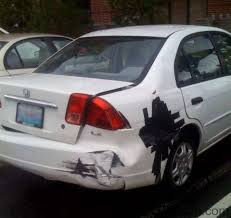

In [9]:
Image(r'C:\Users\pbans\OneDrive\Desktop\Capstone-Project\data1a\training\00-damage\0008.JPEG')

In [10]:
y = prepare_image_224(r'C:\Users\pbans\OneDrive\Desktop\Capstone-Project\data1a\training\00-damage\0008.JPEG')
preds = vgg16.predict(y)
print(get_predictions(preds, top=5))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
[[('n03670208', 'limousine', 0.5594126), ('n02814533', 'beach_wagon', 0.12945025), ('n02930766', 'cab', 0.06118699), ('n02974003', 'car_wheel', 0.0535922), ('n03770679', 'minivan', 0.04433887)]]


In [11]:
z = prepare_image_224(r'C:\Users\pbans\OneDrive\Desktop\Capstone-Project\data1a\training\00-damage\0008.JPEG')
preds = vgg19.predict(z)
print(get_predictions(preds, top=5))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
[[('n03670208', 'limousine', 0.18979682), ('n02814533', 'beach_wagon', 0.14770667), ('n03459775', 'grille', 0.1316177), ('n03930630', 'pickup', 0.08510228), ('n03770679', 'minivan', 0.07025451)]]


In [12]:
a = prepare_image_224(r'C:\Users\pbans\OneDrive\Desktop\Capstone-Project\data1a\training\00-damage\0008.JPEG')
preds = resnet.predict(a)
print(get_predictions(preds))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[('n02814533', 'beach_wagon', 0.41607046), ('n03670208', 'limousine', 0.36545718), ('n02974003', 'car_wheel', 0.055521466), ('n02930766', 'cab', 0.03552771), ('n04037443', 'racer', 0.0259703)]]


In [13]:
b = prepare_image_299(r'C:\Users\pbans\OneDrive\Desktop\Capstone-Project\data1a\training\00-damage\0008.JPEG')
preds = inception.predict(b)
print(get_predictions(preds, top=5))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[('n04328186', 'stopwatch', 0.9999846), ('n06359193', 'web_site', 1.5410998e-05), ('n01924916', 'flatworm', 4.3686642e-14), ('n02841315', 'binoculars', 7.5445664e-16), ('n04355933', 'sunglass', 7.226804e-18)]]


In [14]:
c = prepare_image_299(r'C:\Users\pbans\OneDrive\Desktop\Capstone-Project\data1a\training\00-damage\0008.JPEG')
preds = xception.predict(c)
print(get_predictions(preds, top=5))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step
[[('n03594945', 'jeep', 0.2776874), ('n02099429', 'curly-coated_retriever', 0.12543045), ('n03825788', 'nipple', 0.120987736), ('n03942813', 'ping-pong_ball', 0.11751947), ('n03347037', 'fire_screen', 0.097881176)]]


In [30]:
def get_car_categories():
    d = defaultdict(float)
    img_list = os.listdir(r'C:\\Users\\pbans\\OneDrive\\Desktop\\Capstone-Project\\data1a\\training')
    for i, img_path in enumerate(img_list):
        img = prepare_image_224(r'C:\\Users\\pbans\\OneDrive\\Desktop\\Capstone-Project\\data1a\\training/'+img_path)
        out = vgg16.predict(img)
        preds = get_predictions(out,top=5)
        for pred in preds[0]:
            d[pred[0:2]]+=pred[2]
        if(i%50==0):
            print(i,'/',len(img_list),'complete')
    return Counter(d)

In [31]:
categ_count = get_car_categories()

PermissionError: [Errno 13] Permission denied: 'C:\\\\Users\\\\pbans\\\\OneDrive\\\\Desktop\\\\Capstone-Project\\\\data1a\\\\training/00-damage'

In [22]:
with open('C:\\Users\\pbans\\OneDrive\\Desktop\\Capstone-Project\\data1a\\training\\00-damage', 'r') as file:
    content = file.read()

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\pbans\\OneDrive\\Desktop\\Capstone-Project\\data1a\\training\\00-damage'